## Single point scaling to get dates of the events

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
# import pandas as pd
import dask
# from mpl_toolkits.basemap import Basemap
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp 
%matplotlib inline

In [2]:
import sys
sys.path.append('./functions/')

In [3]:
from functions import ccplot, binning, scaling

In [4]:
plt.style.use('tableau-colorblind10')

In [5]:
fsize = 15
tsize = 18

tdir = 'in'

major = 5.0
minor = 3.0

# plt.style.use(style)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = 1.4
plt.rcParams['legend.handlelength'] = 1.0

In [6]:
n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu_r
lower = cmap(np.linspace(0, diff, n))
lower2 = cmap2(np.linspace(0, diff, n))
white = np.ones((7, 4))
white2 = np.ones((5, 4))
upper = cmap(np.linspace(1-diff, 1, n))
upper2 = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, upper))
colors2 = np.vstack((lower2, white2, upper2))
tmap = m.colors.LinearSegmentedColormap.from_list('map_white', colors)
tmap2 = m.colors.LinearSegmentedColormap.from_list('map_white', colors2)

In [7]:
mfdata_DIR = './data/GPM_lowres_data/*.nc'

# gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=1000, lat=-1, lon=-1), engine='netcdf4', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_dataset('./data/GPM_lowres_data/gpm_2000.nc', chunks={"time":2000})
gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=1000, lat=-1, lon=-1))
gpm = gpm.sel(lat = 19, lon = 72)

In [8]:
precip = gpm.precipCal.resample(time = '24H').sum() / 2 

In [9]:
precip

<xarray.DataArray 'precipCal' (time: 7700)>
dask.array<truediv, shape=(7700,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-06-30
    lon      float64 72.0
    lat      float64 19.0

In [10]:
mfdata_DIR2 = './data/era_data/*.nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40))
era = era.sel(expver=1, drop=True)
era = era.transpose('time', 'latitude', 'longitude')
# era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era = era.rename({'longitude':'lon', 'latitude':'lat'})
era = era.sel(lat = 19, lon=72, time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era

<xarray.Dataset>
Dimensions:  (time: 184800)
Coordinates:
    lon      float32 72.0
    lat      float32 19.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    u10      (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
    v10      (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
    d2m      (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
    t2m      (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
    mx2t     (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
    mn2t     (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
    sst      (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-02 12:58:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [11]:
mfdata_DIR3 = './data/era_pres_data/*.nc'
era_pres = xr.open_mfdataset(mfdata_DIR3, chunks=dict(time=1000, lat=40, lon=40))
# era_pres = era_pres.sel(expver=1, drop=True)
era_pres = era_pres.transpose('time', 'level', 'latitude', 'longitude')
# era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era_pres = era_pres.rename({'longitude':'lon', 'latitude':'lat'})
era_pres = era_pres.sel(lat = 19, lon=72, time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era_pres

<xarray.Dataset>
Dimensions:  (level: 29, time: 184800)
Coordinates:
    lon      float32 72.0
    lat      float32 19.0
  * level    (level) int32 50 70 100 125 150 175 ... 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    q        (time, level) float32 dask.array<chunksize=(720, 29), meta=np.ndarray>
    t        (time, level) float32 dask.array<chunksize=(720, 29), meta=np.ndarray>
    w        (time, level) float32 dask.array<chunksize=(720, 29), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-11 08:18:32 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [12]:
era2 = xr.open_mfdataset('./data/era_data2/*.nc', chunks=dict(time=1000, lat=40, lon=40))
# era2 = era2.sel(expver=1, drop=True)
era2 = era2.transpose('time', 'latitude', 'longitude')
# era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era2 = era2.rename({'longitude':'lon', 'latitude':'lat'})
era2 = era2.sel(lat = 19, lon=72, time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era2

<xarray.Dataset>
Dimensions:  (time: 184800)
Coordinates:
    lon      float32 72.0
    lat      float32 19.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    e        (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
    vimd     (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-04 12:51:49 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [13]:
era3 = xr.open_mfdataset('../../2308-35BD/msc_project/data/cape/*.nc', chunks=dict(time=1000, lat=40, lon=40))
# era2 = era2.sel(expver=1, drop=True)
era3 = era3.transpose('time', 'latitude', 'longitude')
# era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era3 = era3.rename({'longitude':'lon', 'latitude':'lat'})
era3 = era3.sel(lat = 19, lon=72, time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era3

<xarray.Dataset>
Dimensions:  (time: 184800)
Coordinates:
    lon      float32 72.0
    lat      float32 19.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    cape     (time) float32 dask.array<chunksize=(352,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-12 14:55:50 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [14]:
era4 = xr.open_mfdataset('../../2308-35BD/msc_project/data/wind/*.nc', chunks=dict(time=1000, lat=40, lon=40))
# era2 = era2.sel(expver=1, drop=True)
era4 = era4.transpose('time', 'level', 'latitude', 'longitude')
# era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era4 = era4.rename({'longitude':'lon', 'latitude':'lat'})
era4 = era4.sel(lat = 19, lon=72, time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era4

<xarray.Dataset>
Dimensions:  (level: 2, time: 184800)
Coordinates:
    lon      float32 72.0
    lat      float32 19.0
  * level    (level) int32 200 850
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    u        (time, level) float32 dask.array<chunksize=(352, 2), meta=np.ndarray>
    v        (time, level) float32 dask.array<chunksize=(352, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-11 15:44:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [15]:
t2m = era.t2m.resample(time = '24H').mean()
d2m = era.d2m.resample(time = '24H').mean()
q = era_pres.q.resample(time = '24H').mean()
w = era_pres.w.resample(time = '24H').mean()
t = era_pres.t.resample(time = '24H').mean()
# u = era4.u.sel(level=[850, 200]).resample(time = '24H').mean()
# v = era4.v.sel(level=[850, 200]).resample(time = '24H').mean()
# vimd = era2.vimd.resample(time = '24H').sum()
# cape = era3.cape.resample(time = '24H').sum()

KeyboardInterrupt: 

In [ ]:
ds_comb = xr.merge([precip, t2m, d2m])
ds_comb2 = xr.merge([q, t, w])
ds_comb2

In [ ]:
mon = [6,7,8,9]
premon = [3,4,5]
postmon = [10,11,12]
wint = [1,2]

In [ ]:
ds_comb_mon = xr.concat([list(ds_comb.groupby('time.month'))[i-1][1] for i in mon], dim='time')
ds_comb_mon2 = xr.concat([list(ds_comb2.groupby('time.month'))[i-1][1] for i in mon], dim='time')

In [ ]:
ds_comb_mon = ds_comb_mon.sortby('time.year')
ds_comb_mon2 = ds_comb_mon2.sortby('time.year')
ds_comb_mon2

In [ ]:
ds_comb_mon_loaded = ds_comb_mon.load()
ds_comb_mon2_loaded = ds_comb_mon2.load()

In [18]:
precip_loaded = ds_comb_mon_loaded.precipCal.where(ds_comb_mon_loaded.precipCal > 1)
t2m_loaded = ds_comb_mon_loaded.t2m.where(precip_loaded != np.nan)
d2m_loaded = ds_comb_mon_loaded.d2m.where(precip_loaded != np.nan)
# vimd_loaded = ds_comb_mon_loaded.vimd.where(precip_loaded != np.nan)
# cape_loaded = ds_comb_mon_loaded.cape.where(precip_loaded != np.nan)
w_loaded = ds_comb_mon2_loaded.w.where(precip_loaded != np.nan)
q_loaded = ds_comb_mon2_loaded.q.where(precip_loaded != np.nan)
t_loaded = ds_comb_mon2_loaded.t.where(precip_loaded != np.nan)
# u_loaded = ds_comb_mon2_loaded.u.where(precip_loaded != np.nan)
# v_loaded = ds_comb_mon2_loaded.v.where(precip_loaded != np.nan)

In [19]:
from scipy import stats

# Utility function

# util function to determing the number of bins
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x, axis= None))

# No longer required
# def get_mids(x):
#     bin_mids = []
#     for i in range(0, len(x)-1):
#         bin_mid = (x[i] + x[i + 1])*0.5
#         bin_mids.append(bin_mid)

#     return np.array(bin_mids)

def get_res(x, y):
    # if np.isnan(np.sum(y)):
    #     slope, intercept, r, p, se = stats.linregress(x, y)
    # else:
    slope, _, _, p, _ = stats.linregress(x, np.log(y))

    return slope, p

In [49]:
def get_events_precip(p95, preciparr):
    idxs = np.where(preciparr >= p95)
    events = preciparr[idxs]
    return events, idxs
# util function to calculate value of qs
def get_qs(temp, pres):
    a1 = 6.1114
    temp0 = 273.16
    a3w = 17.269
    a4w = 35.86
    a3i = 21.875
    a4i = 7.66
    # calculating saturation vapor pressure using temperature values
    if temp > temp0:
        a3 = a3w
        a4 = a4w
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    elif temp < temp0 - 23:
        a3 = a3i
        a4 = a4i
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    else:
        esw = a1 * np.exp(a3w * ((temp - temp0)/(temp - a4w)))
        esi = a1 * np.exp(a3i * ((temp - temp0)/(temp - a4i)))
        es = esi + ((esw - esi)*(((temp - (temp0 - 23))/23)**2))
    # get saturation specific humidity value
    epsilon = 0.622
    qs = (epsilon * es) / (pres - ((1 - epsilon)*es))
    return qs
# vert integral function (Simpson's method)
def vert_integ(x, y):
    int = integrate.simpson(y, x, even='avg')
    return int
# finite differnce methods to find derivative
def centered_diff(arr):
    arr_diff = np.empty(len(arr) - 2)
    for i in range((len(arr) - 2)):
        arr_diff[i] = arr[i+2] - arr[i]
    return arr_diff
def forward_diff(arr):
    arr_diff = np.diff(arr)
    return arr_diff
def backward_diff(arr):
    arr_diff = -(np.diff(arr[::-1])[::-1])
    return arr_diff
def get_pe1(temp, omega, pres, omega_mean):
    pres_range = len(pres)
    time_range = len(temp)
    pe = np.empty(time_range)
    thermo = np.empty(time_range)
    p_cdiff = centered_diff(pres)
    p_fdiff = forward_diff(pres)
    p_bdiff = backward_diff(pres)
    # taking mean omega of all extremes to get the thermodynamic contribution
    qs = np.empty(pres_range)
    for j in range(pres_range):
        qs[j] = get_qs(temp[j], pres[j])
        qs_cdiff = centered_diff(qs)/(p_cdiff)
        qs_fdiff = forward_diff(qs)/(p_fdiff)
        qs_bdiff = backward_diff(qs)/(p_bdiff)
        qs_diff = np.insert(qs_cdiff, 0, qs_fdiff[0])
        qs_diff = np.append(qs_diff, qs_bdiff[-1])
        # TODO VARY: the value of 3600 will change for different time calculations
        # 1 hour -> 3600s
        # 3 hour -> 3600*3 and so on
        # '+' sign as pressure is from surface-to-top and not top-to-surface
        pe = np.abs((-1/(9.806)) * vert_integ(pres, omega*qs_diff)) * 3600
        thermo = np.abs((-1/(9.806)) * vert_integ(pres, omega_mean*qs_diff)) * 3600
    dyn = pe - thermo
    return pe, dyn, thermo


In [20]:
bins_t2m = equalObs(t2m_loaded, 20)
bins_d2m = equalObs(d2m_loaded, 20)

In [57]:
grouped_precip_t2m = precip_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10)
grouped_precip_d2m = precip_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10)
precip_t2m_95 = grouped_precip_t2m.quantile(0.95, interpolation='midpoint')
precip_t2m_50 = grouped_precip_t2m.quantile(0.50, interpolation='midpoint')
precip_d2m_95 = grouped_precip_d2m.quantile(0.95, interpolation='midpoint')
precip_d2m_50 = grouped_precip_d2m.quantile(0.50, interpolation='midpoint')

mean_t2m = t2m_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10).mean(dim='time')
mean_d2m = d2m_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10).mean(dim='time')

# mean_vimd_d2m = vimd_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10).mean(dim='time')
# mean_cape_d2m = cape_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10).mean(dim='time')
# mean_t_d2m = t_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10).mean(dim='time')
# mean_w_d2m = w_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10).mean(dim='time')
# mean_q_d2m = q_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10).mean(dim='time')
# mean_u_d2m = u_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10).mean(dim='time')
# mean_v_d2m = v_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10).mean(dim='time')

# grouped_vimd_t2m = vimd_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10)
# grouped_vimd_d2m = vimd_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10)
# vimd_t2m_95 = grouped_vimd_t2m.quantile(0.95, interpolation='midpoint')
# vimd_t2m_50 = grouped_vimd_t2m.quantile(0.50, interpolation='midpoint')
# vimd_d2m_95 = grouped_vimd_d2m.quantile(0.95, interpolation='midpoint')
# vimd_d2m_50 = grouped_vimd_d2m.quantile(0.50, interpolation='midpoint')

# grouped_cape_t2m = cape_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10)
# grouped_cape_d2m = cape_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10)
# cape_t2m_95 = grouped_cape_t2m.quantile(0.95, interpolation='midpoint')
# cape_t2m_50 = grouped_cape_t2m.quantile(0.50, interpolation='midpoint')
# cape_d2m_95 = grouped_cape_d2m.quantile(0.95, interpolation='midpoint')
# cape_d2m_50 = grouped_cape_d2m.quantile(0.50, interpolation='midpoint')

grouped_q_t2m = q_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10)
grouped_q_d2m = q_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10)
q_t2m_95 = grouped_q_t2m.quantile(0.95, interpolation='midpoint')
q_t2m_50 = grouped_q_t2m.quantile(0.50, interpolation='midpoint')
q_d2m_95 = grouped_q_d2m.quantile(0.95, interpolation='midpoint')
q_d2m_50 = grouped_q_d2m.quantile(0.50, interpolation='midpoint')

grouped_w_t2m = w_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10)
grouped_w_d2m = w_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10)
w_t2m_95 = grouped_w_t2m.quantile(0.95, interpolation='midpoint')
w_t2m_50 = grouped_w_t2m.quantile(0.50, interpolation='midpoint')
w_d2m_95 = grouped_w_d2m.quantile(0.95, interpolation='midpoint')
w_d2m_50 = grouped_w_d2m.quantile(0.50, interpolation='midpoint')

grouped_t_t2m = t_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10)
grouped_t_d2m = t_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10)
t_t2m_95 = grouped_t_t2m.quantile(0.95, interpolation='midpoint')
t_t2m_50 = grouped_t_t2m.quantile(0.50, interpolation='midpoint')
t_d2m_95 = grouped_t_d2m.quantile(0.95, interpolation='midpoint')
t_d2m_50 = grouped_t_d2m.quantile(0.50, interpolation='midpoint')

# grouped_u_t2m = u_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10)
# grouped_u_d2m = u_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10)
# u_t2m_95 = grouped_u_t2m.quantile(0.95, interpolation='midpoint')
# u_t2m_50 = grouped_u_t2m.quantile(0.50, interpolation='midpoint')
# u_d2m_95 = grouped_u_d2m.quantile(0.95, interpolation='midpoint')
# u_d2m_50 = grouped_u_d2m.quantile(0.50, interpolation='midpoint')

# grouped_v_t2m = v_loaded.groupby_bins(t2m_loaded, bins_t2m, include_lowest=True, precision=10)
# grouped_v_d2m = v_loaded.groupby_bins(d2m_loaded, bins_d2m, include_lowest=True, precision=10)
# v_t2m_95 = grouped_v_t2m.quantile(0.95, interpolation='midpoint')
# v_t2m_50 = grouped_v_t2m.quantile(0.50, interpolation='midpoint')
# v_d2m_95 = grouped_v_d2m.quantile(0.95, interpolation='midpoint')
# v_d2m_50 = grouped_v_d2m.quantile(0.50, interpolation='midpoint')

In [58]:
pres = w_loaded.coords['level'].to_numpy()

In [50]:
from scipy import integrate

In [59]:
pe = np.empty(20)
dyn = np.empty(20)
thermo = np.empty(20)
omega_mean = w_d2m_95.mean(dim='d2m_bins')
for i in range(20):
    pe[i], dyn[i], thermo[i] = get_pe1(t_d2m_95.isel(d2m_bins = i), w_d2m_95.isel(d2m_bins=i), pres, omega_mean)
    print(f"Completed {i+1}/20", end='\r')

In [60]:
pe*24

array([10.63368031,  9.15445789,  9.20465591,  7.6967682 ,  7.06248485,
        7.02697571,  7.3430905 ,  6.4566409 ,  7.23668309,  6.50274105,
        7.69915148,  8.87591993,  7.35254076,  6.67832627,  8.06350928,
        7.02372095,  6.99295913,  9.44675937,  7.69512325, 13.80583595])

In [61]:
precip_d2m_95

<xarray.DataArray 'precipCal' (d2m_bins: 20)>
array([ 74.31248474,  22.87862301,  22.080019  , 104.93546677,
        47.5905056 ,  76.15200043, 105.7265358 ,  82.95194244,
        91.72689819,  59.97116661,  79.93392944,  60.02581787,
       179.44841003,  90.07865143, 131.0442276 , 127.47831726,
        93.37190628, 132.93873215,  63.15995026, 125.55361938])
Coordinates:
  * d2m_bins  (d2m_bins) object (293.93728637690003, 296.4937561035] ... (298...
    quantile  float64 0.95

(37.9384083101441, 0.027447633258709792)

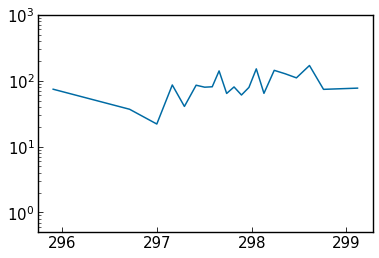

In [95]:
plt.semilogy(mean_d2m, precip_d2m_95)
plt.ylim(0.5, 1000)
slope, p = get_res(mean_d2m, precip_d2m_95)
ccscale = 100*(np.exp(slope) - 1)
ccscale, p

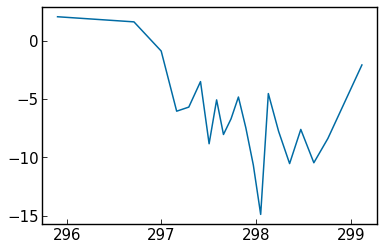

In [96]:
plt.plot(mean_d2m, mean_vimd_d2m)

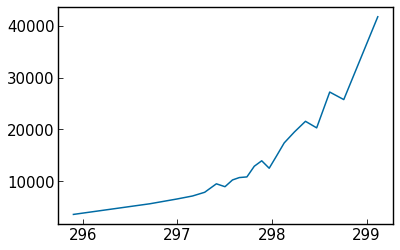

In [97]:
plt.plot(mean_d2m, mean_cape_d2m)

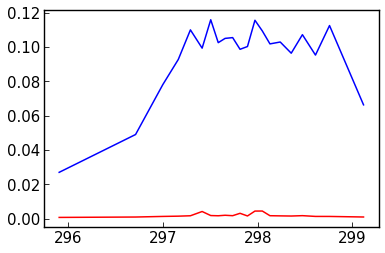

In [98]:
plt.plot(mean_d2m, mean_q_d2m.sel(level = 850)*np.sqrt(mean_u_d2m.sel(level = 850)**2 + mean_v_d2m.sel(level = 850)**2), color = 'b', label = 'llmt')
plt.plot(mean_d2m, mean_q_d2m.sel(level = 200)*np.sqrt(mean_u_d2m.sel(level = 200)**2 + mean_v_d2m.sel(level = 200)**2), color = 'r', label = 'ulmt')

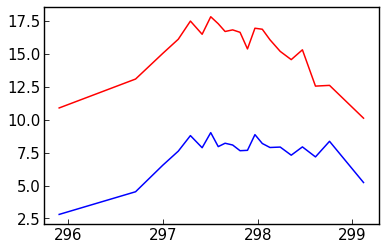

In [99]:
plt.plot(mean_d2m, np.sqrt(mean_u_d2m.sel(level = 850)**2 + mean_v_d2m.sel(level = 850)**2), color = 'b', label = 'ws850')
plt.plot(mean_d2m, np.sqrt(mean_u_d2m.sel(level = 200)**2 + mean_v_d2m.sel(level = 200)**2), color = 'r', label = 'ws200')